In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

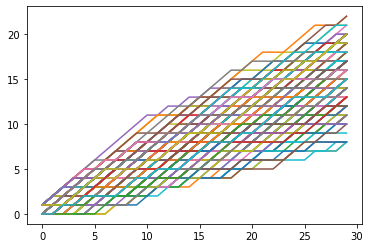

In [2]:
N = 30
M = 200
p = 0.5

X = np.random.binomial(1, p, size=(N, M))
X = np.cumsum(X,axis=0)

for m in range(M):
    plt.plot(X[:,m])

In [3]:
fig, axes = plt.subplots(2,2,figsize=(12,8))
axes = axes.flatten()
plt.close()

In [4]:
for m in range(M):
    axes[0].plot(X[:,m], alpha=0.1, c='tab:blue')
    
axes[0].spines['left'].set_visible(False)
axes[0].spines['top'].set_visible(False)
axes[0].yaxis.set_ticks_position('right')
axes[0].yaxis.set_label_position('right')
axes[0].set_xlabel('N',loc='right', labelpad=0.8)
c = axes[0].set_ylabel(r'$\Sigma x_n$', loc='top', rotation=0)
axes[0].set(ylim=(0,34), xlim=(0,30))


[(0.0, 34.0), (0.0, 30.0)]

In [5]:
values = np.arange(0,N+1)
pmf_values = stats.binom(p=0.5,n=N).pmf(values)
axes[1].vlines(values,0,pmf_values,lw=4)
axes[1].spines['right'].set_visible(False)
axes[1].spines['top'].set_visible(False)
axes[1].set_xlabel(r'$\Sigma x_n$', loc='right')

Text(1, 0, '$\\Sigma x_n$')

In [6]:
x_grid = np.linspace(0,1)
clt_norm = stats.norm(p,np.sqrt(np.var(X[N-1,:]))/N)
axes[2].vlines(values/N,0,pmf_values,lw=4)
axes[2].spines['right'].set_visible(False)
axes[2].spines['top'].set_visible(False)
axes[2].set_xlabel(r'$\frac{1}{N}\Sigma x_n$', loc='right')

Text(1, 0, '$\\frac{1}{N}\\Sigma x_n$')

In [7]:
cdf_values = stats.binom(p=0.5,n=N).cdf(values)
axes[3].step(values/N, cdf_values, label='Empirisk fordeling')
axes[3].plot(x_grid, clt_norm.cdf(x_grid), label='Normal tilnærming')
axes[3].spines['right'].set_visible(False)
axes[3].spines['top'].set_visible(False)
axes[3].set_xlabel(r'$\frac{1}{N}\Sigma x_n$', loc='right')
axes[3].legend()

In [8]:
subtitles = ['A.', 'B.', 'C.', 'D.']
for i in range(len(subtitles)):
    axes[i].title.set_text(subtitles[i])

In [9]:
fig.savefig('bernoulli_sample.pdf')

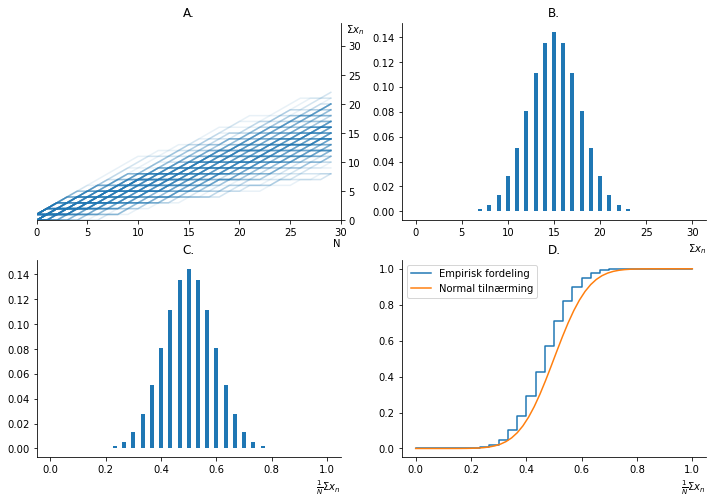

In [10]:
fig